# Data Analyst Job Postings Analysis

## Introduction
Data set was taken from Kaggle provided by LUKE BAROUSSE [Data Analyst Job Postings (Pay, Skills, Benefits)](https://www.kaggle.com/datasets/lukebarousse/data-analyst-job-postings-google-search/data). This dataset pulls job postings from Google's search results for Data Analyst positions in the United States. Data collection started on November 4th, 2022, and adds ~100 new job postings to this dataset daily.

### The analysis's goal
This analysis helps us better understand the top skills needed for a data analyst job and gain more insight into this profession.

## Main body

### Questions
- What is the average, minimum, and maximum salary for a data analyst position?
- Which skills are most frequently mentioned in job postings?
- Which platform posted the highest number of jobs?
- Which companies posted the highest number of jobs?
- Which location has the highest number of job postings?
- Which type of work occurs most frequently?

## Analysis

In [57]:
# Library Support
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# reading the csv
dataframe = pd.read_csv('gsearch_jobs.csv', header=0, sep=',')
dataframe.head()

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,0,Data Analyst,Meta,Anywhere,via LinkedIn,In the intersection of compliance and analytic...,"['15 hours ago', '101K–143K a year', 'Work fro...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,101K–143K,a year,122000.0,101000.0,143000.0,NaN,122000.0,122000.0,"['sql', 'python', 'r', 'tableau']"
1,1,1,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,2,2,Aeronautical Data Analyst,"Garmin International, Inc.","Olathe, KS",via Indeed,Overview:\n\nWe are seeking a full-time...\nAe...,"['18 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJBZXJvbmF1dGljYWwgRGF0YSBBbm...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['sql']
3,3,3,Data Analyst - Consumer Goods - Contract to Hire,Upwork,Anywhere,via Upwork,Enthusiastic Data Analyst for processing sales...,"['12 hours ago', '15–25 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBDb25zdW...,NaN,...,NaN,15–25,an hour,20.0,15.0,25.0,20.0,NaN,41600.0,"['power_bi', 'excel', 'powerpoint']"
4,4,4,Data Analyst | Workforce Management,Krispy Kreme,United States,via LinkedIn,Overview of Position\n\nThis position will be ...,"['7 hours ago', '90K–110K a year', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgfCBXb3JrZm...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,90K–110K,a year,100000.0,90000.0,110000.0,NaN,100000.0,100000.0,"['word', 'outlook', 'excel', 'powerpoint']"


The dataset consists of 27 columns, including: title, company_name, location, via (indicating the platform through which the jobs were posted), description, extensions, schedule_type (indicating the type of job such as full-time, contractor, etc.), work_from_home (indicating whether remote work is possible), salary, description_tokens (indicating skills mentioned in job requirements), etc.

### Data cleaning

In [58]:
duplicate_rows = dataframe.duplicated(subset=['title', 'company_name', 'description'])
duplicate_rows.value_counts()

False    32501
True     12774
Name: count, dtype: int64

The dataset was checked for duplicate values based on identical title, company name, and description. A total of 12774 duplicate entries were found. 

In [59]:
#drop dupicate values
dataframe = dataframe.drop_duplicates(subset=['title', 'company_name', 'description'])
len(dataframe)

32501

### Salary statistic

In [60]:
salary_statistic = dataframe[['salary_avg', 'salary_min', 'salary_max']].describe()
salary_statistic

,salary_avg,salary_min,salary_max
count,5800.000000,5438.000000,5438.000000
mean,33151.289245,27822.941565,38985.418019
std,51451.939941,43441.430218,60693.979109
min,7.250000,8.000000,10.000000
25%,31.000000,18.000000,45.000000
50%,57.500000,40.000000,75.000000
75%,75000.000000,62900.000000,90000.000000
max,300000.000000,275000.000000,346000.000000


The data shows that the average salary for a data analyst position is 33,151.2, with a minimum salary of 27,822.9 and a maximum salary of 38,985.4. However, there is a significant disparity between the minimum and maximum values in the average salary (7.25 and 300,000, respectively), indicating that the salary values are a mixture of hourly and yearly rates.

In [61]:
hourly_salary = dataframe[dataframe['salary_hourly'].notnull()]
yearly_salary = dataframe[dataframe['salary_yearly'].notnull()]

hourly_salary_statistic = hourly_salary[['salary_avg', 'salary_min', 'salary_max']].describe()
yearly_salary_statistic = yearly_salary[['salary_avg', 'salary_min', 'salary_max']].describe()
hourly_salary_statistic, yearly_salary_statistic

(        salary_avg   salary_min   salary_max
 count  3882.000000  3644.000000  3644.000000
 mean     42.981785    30.426836    55.791078
 std      23.221872    18.974942    31.931444
 min       7.250000     8.000000    10.000000
 25%      25.500000    16.000000    35.000000
 50%      37.500000    25.000000    50.000000
 75%      57.500000    40.000000    75.000000
 max     300.000000   200.000000   500.000000,
           salary_avg     salary_min     salary_max
 count    1899.000000    1777.000000    1777.000000
 mean   101092.731854   85025.491846  119105.906162
 std     34943.114044   30229.730631   41663.699027
 min     29289.840000   27519.630000   35000.000000
 25%     75000.000000   65000.000000   90000.000000
 50%     96500.000000   80000.000000  115000.000000
 75%    116825.000000  100000.000000  140000.000000
 max    300000.000000  275000.000000  346000.000000)

Salary statistic:

Hourly:

Average hourly salary:
- mean: 42.9
- min: 7.25
- mode: 37.5
- max: 300

Minimum hourly salary:
- mean: 30.4
- min: 8
- mode: 25
- max: 200

Maximum hourly salary:
- mean: 55.7
- min: 10
- mode: 50
- max: 500

Yearly:

Average yearly salary:
- mean: 101,092.7
- min: 29,289.8
- mode: 96,500
- max: 300,000

Minimum yearly salary:
- mean: 85,025.4
- min: 27,519.6
- mode: 80,000
- max: 275,000

Maximum yearly salary:
- mean: 119,105.9
- min: 35,000
- mode: 115,000
- max: 346,000

As we can see from the data, the minimum hourly salary is 7.25, and the maximum hourly salary is 500. The minimum yearly salary is 27,519.6, and the maximum yearly salary is 346,000.

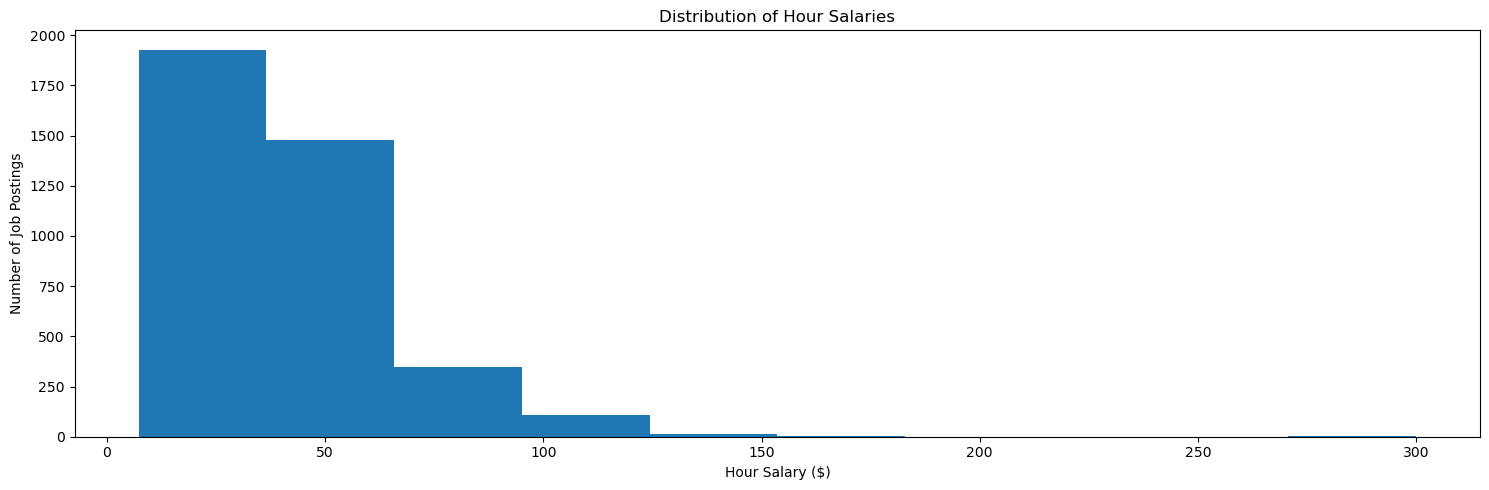

In [62]:
plt.figure(figsize=(15, 5))
plt.hist(dataframe['salary_hourly'])
plt.title('Distribution of Hour Salaries')
plt.xlabel('Hour Salary ($)')
plt.ylabel('Number of Job Postings')
plt.tight_layout()
plt.show()

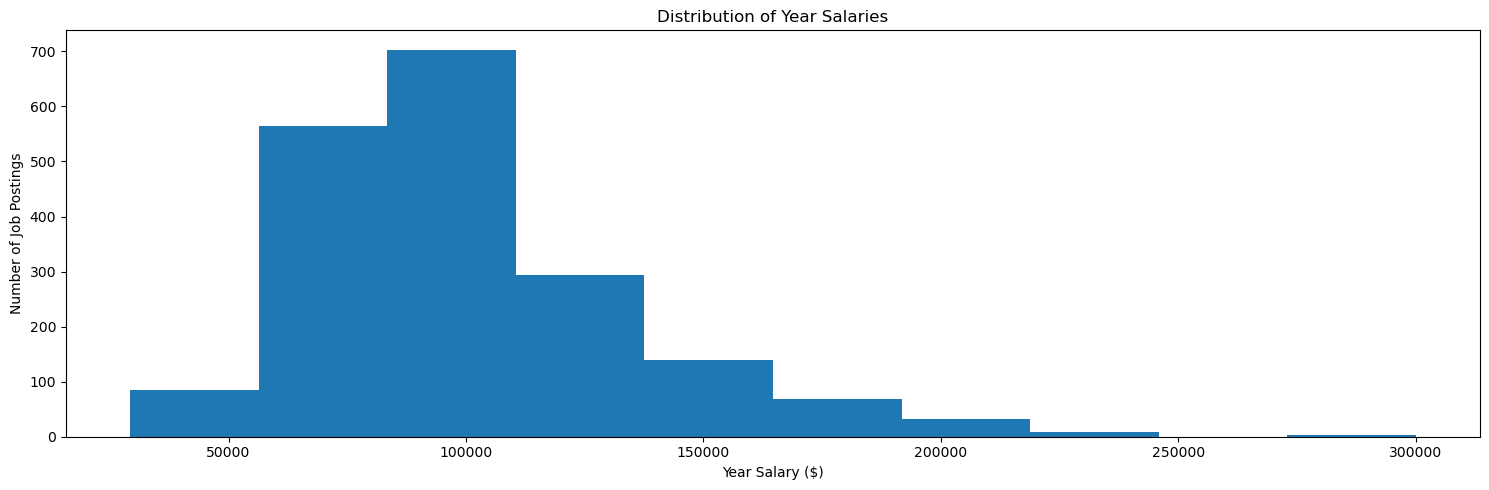

In [63]:
plt.figure(figsize=(15, 5))
plt.hist(dataframe['salary_yearly'])
plt.title('Distribution of Year Salaries')
plt.xlabel('Year Salary ($)')
plt.ylabel('Number of Job Postings')
plt.tight_layout()
plt.show()

The charts illustrate the distribution of hourly and yearly salaries.

### Desirable skills

In [64]:
skills = dataframe['description_tokens']
skills_count = skills.value_counts()
top_skills = skills_count.head(15)
top_skills

description_tokens
[]                             6834
['excel']                      1228
['sql']                        1147
['sql', 'excel']                560
['sql', 'tableau']              228
['power_bi']                    221
['go']                          219
['python']                      217
['tableau']                     197
['sql', 'excel', 'tableau']     176
['power_bi', 'excel']           175
['spreadsheet']                 172
['sql', 'python']               170
['r']                           167
['sql', 'python', 'r']          150
Name: count, dtype: int64

Based on the data, the most frequent skills mentioned in job postings are Excel, SQL, Tableau, and Power BI.

### Top platforms 

In [65]:
platform = dataframe['via']
platform_count = platform.value_counts()
top_platform = platform_count.head(15)
top_platform

via
via LinkedIn            12244
via Upwork               5685
via BeBee                3872
via Trabajo.org          2313
via Indeed               1508
via Jobs Trabajo.org      619
via ZipRecruiter          587
via Adzuna                466
via Built In              349
via Jora                  298
via Snagajob              284
via Ai-Jobs.net           264
via SimplyHired           211
via Recruit.net           155
via Nexxt                 131
Name: count, dtype: int64

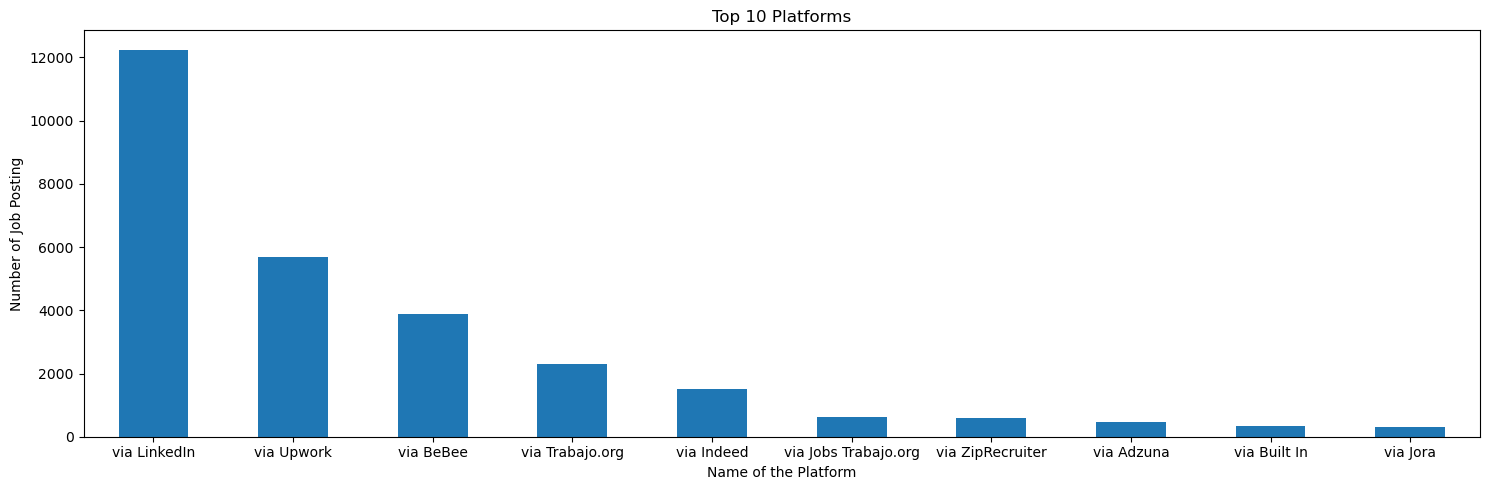

In [74]:
plt.figure(figsize=(15, 5))
platform_count.head(10).plot(kind='bar')
plt.title('Top 10 Platforms')
plt.xlabel('Name of the Platform')
plt.ylabel('Number of Job Posting')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The data shows that the platform with the highest number of job postings is LinkedIn, with at least twice as many postings as the other platforms.

### Top companies

In [67]:
company = dataframe['company_name']
company_count = company.value_counts()
top_company = company_count.head(15)
top_company

company_name
Upwork                                     5692
Talentify.io                                985
Dice                                        487
Walmart                                     417
Insight Global                              327
Corporate                                   263
Centene Corporation                         166
EDWARD JONES                                118
CareerBuilder                               109
Apex Systems                                100
Harnham                                      89
State of Missouri                            84
General Dynamics Information Technology      81
UnitedHealth Group                           80
Elevance Health                              80
Name: count, dtype: int64

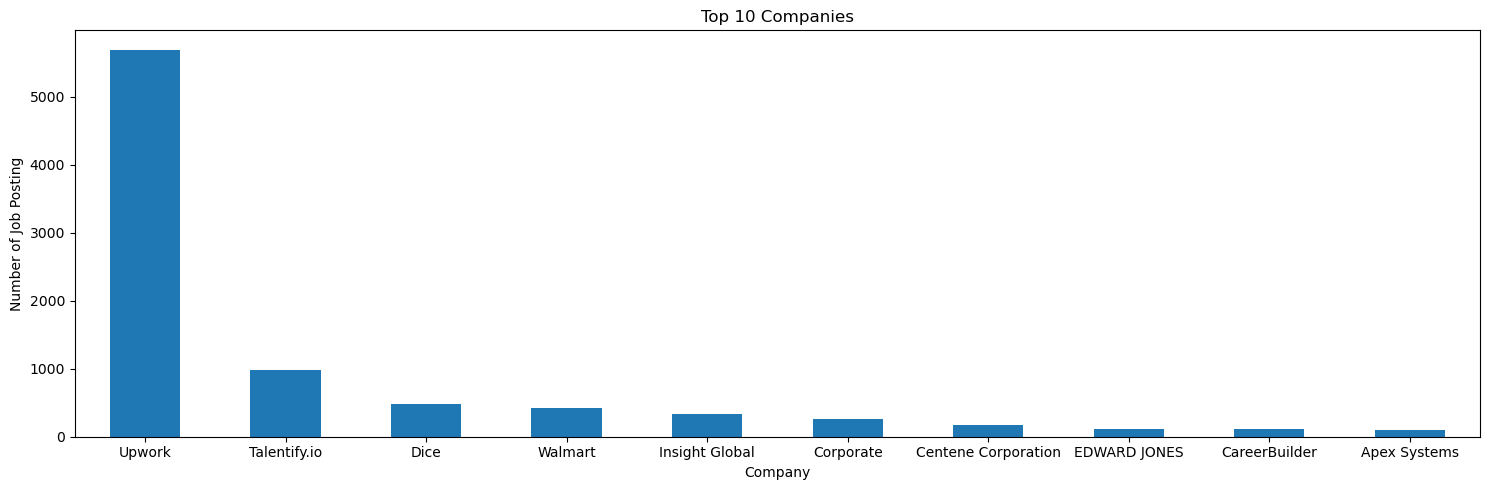

In [68]:
plt.figure(figsize=(15, 5))
company_count.head(10).plot(kind='bar')
plt.title('Top 10 Companies')
plt.xlabel('Company')
plt.ylabel('Number of Job Posting')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

According to the analysis, the leading company for job postings is Upwork, offering a significant number of freelance or contract jobs. Following Upwork are Talentify.io, Dice, and Walmart.

### Top locations

In [69]:
location = dataframe['location'].str.strip()
location_count = location.value_counts()
top_location = location_count.head(15)
top_location

location
Anywhere              16810
United States          9514
Kansas City, MO         763
Oklahoma City, OK       758
Jefferson City, MO      453
Bentonville, AR         383
Wichita, KS             278
Tulsa, OK               278
Overland Park, KS       253
Topeka, KS              247
Springfield, MO         187
Columbia, MO            150
California, MO          129
Kansas City, KS         118
Lenexa, KS               84
Name: count, dtype: int64

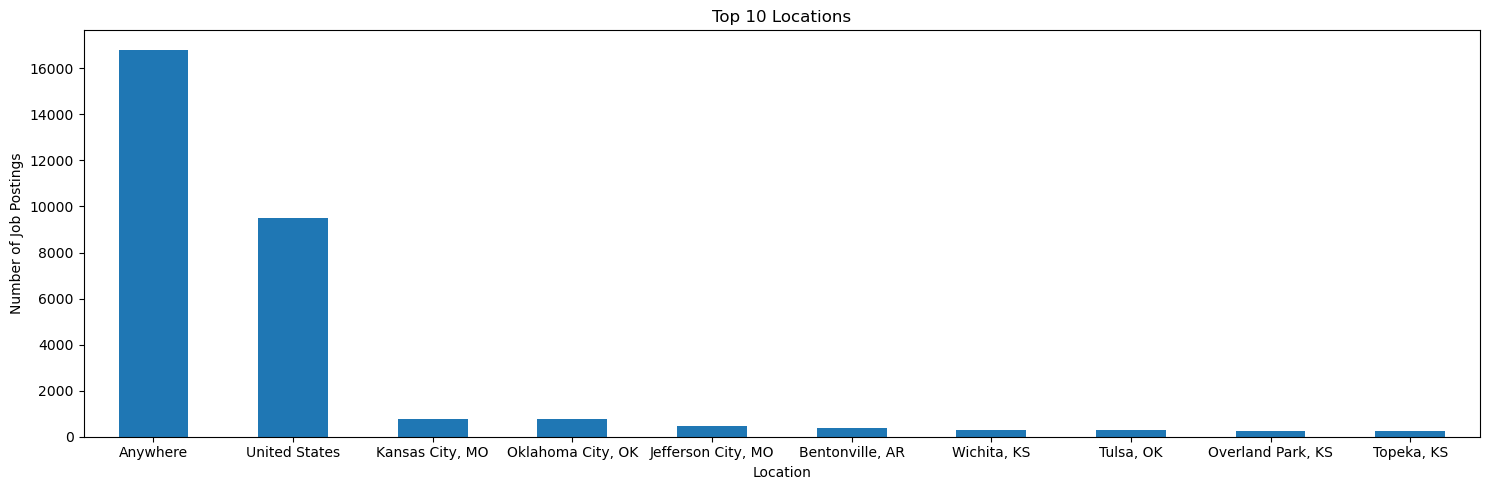

In [70]:
plt.figure(figsize=(15, 5))
location_count.head(10).plot(kind='bar')
plt.title('Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

As we can see from the chart, a significant number of job offers allow remote work. The cities with the highest number of job postings are Kansas City, Oklahoma City, and Jefferson City.

In [71]:
work_from_home = dataframe['work_from_home']
work_from_home_count = work_from_home.value_counts()
work_from_home_count, len(work_from_home)

(work_from_home
 True    16810
 Name: count, dtype: int64,
 32501)

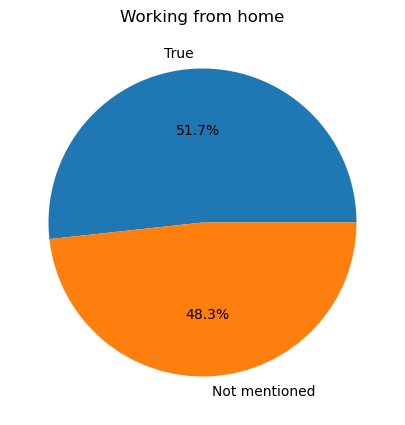

In [72]:
work_from_home = dataframe['work_from_home'].fillna('Not mentioned')
plt.figure(figsize=(15, 5))
plt.pie(work_from_home.value_counts(), labels=work_from_home.value_counts().index, autopct='%1.1f%%')
plt.title('Working from home')
plt.show()

The findings reveal that out of 32,501 job postings, 16,810 jobs offer remote work opportunities, accounting for 51.7% of the total.

### Type of work

In [73]:
stype = dataframe['schedule_type']
stype_count = stype.value_counts()
top_stype = stype_count.head(15)
top_stype

schedule_type
Full-time                               22203
Contractor                               6757
Contractor and Temp work                 1940
Part-time                                 369
Full-time and Part-time                   238
Internship                                183
Full-time and Contractor                  179
Full-time and Temp work                   141
Full-time and Internship                   93
Temp work                                  90
Full-time, Contractor, and Temp work       50
Part-time, Contractor, and Temp work       24
Part-time and Contractor                   21
Volunteer                                  21
Full-time, Part-time, and Internship       17
Name: count, dtype: int64

The results indicate that the most frequent types of work are Full-time and Contractor, with a much smaller number in Temporary work, Part-time, and Internship roles.

## Conclusion
- The average salary for a data analyst position is 42.9 per hour or 101,092.7 yearly.
- The most desirable skills for the data analyst profession are Excel, SQL, Tableau, and Power BI.
- The platform with the highest number of job postings is LinkedIn.
- The leading companies for job postings are Upwork, followed by Talentify.io, Dice, and Walmart.
- More than half (51.7%) of jobs offer remote work opportunities.